In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run ./utils.ipynb
n=3
step=0.05
num_of_samples_per_bit_1=math.ceil(1/step)

In [3]:
# Step(1) Generate Binary Source 
# 0s and 1s with equal Probabilities 0.5
# nums = np.random.choice([0, 1], size=n, p=[.5,.5])
# print(nums)
nums=np.array([0, 1, 1])

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


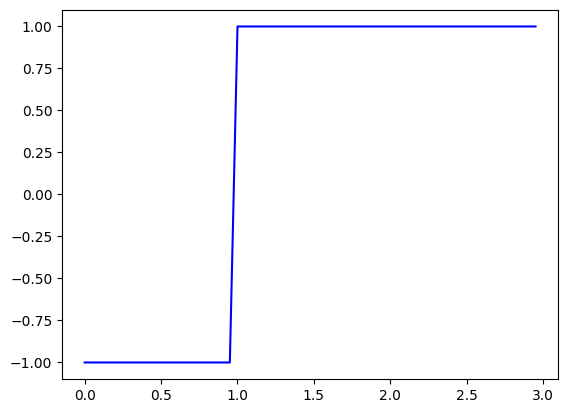

In [4]:
t=np.arange(0,n,step)
signal=binarycode_to_signal(nums, 0.05)#step=0.05 Question
print(signal)
plt.plot(t, signal, '-b')

In [7]:
# receive with matched filter1
received_filter_matched_1 = np.ones(num_of_samples_per_bit_1)
# receive with no filter2
received_filter_matched_2 = None
# receive with ramp filter
received_filter_ramp_3 = np.random.uniform(low=0, high=3**0.5, size=num_of_samples_per_bit_1)

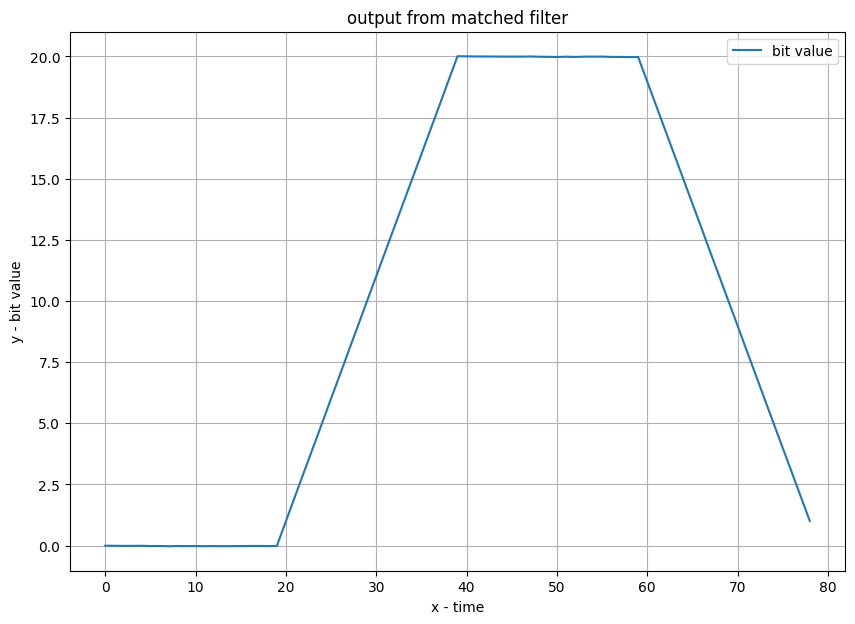

In [8]:
E = 1
for E_div_N0_db in range(-10, 21):
    E_div_N0 = 10 ** (E_div_N0_db/10)
    transmitted_samples, received_samples = add_noise(nums, E/(2*E_div_N0),n,step)
    filtered_samples, filtered_bits = calc_c(received_samples, received_filter_matched_1,n,num_of_samples_per_bit_1)
#ploting
plt.figure(figsize=(10,7))
plt.plot(range(0, filtered_samples.flatten().shape[0]), filtered_samples.flatten(), label = "bit value")

plt.xlabel('x - time')
plt.ylabel('y - bit value')
plt.title('output from matched filter')

plt.legend()
plt.grid()
plt.show()

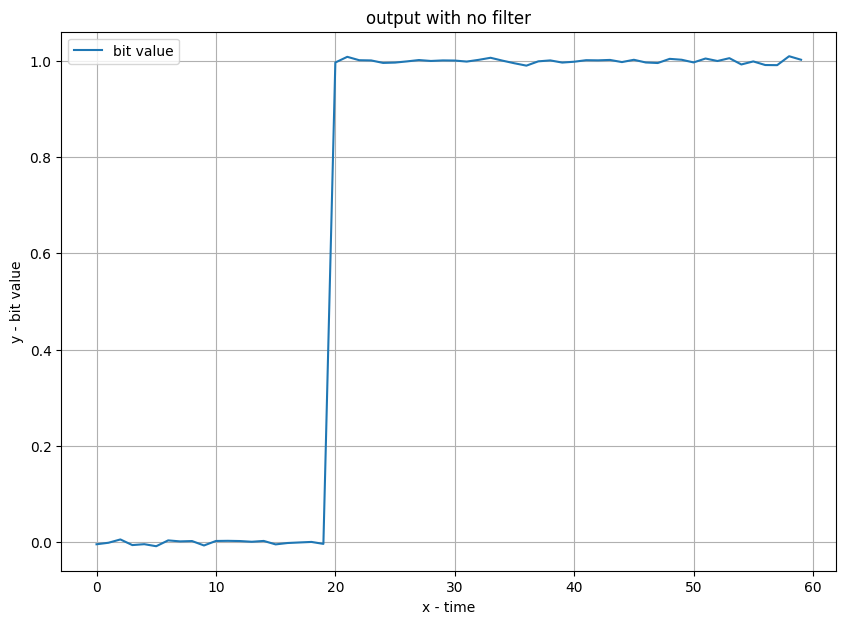

In [17]:
E = 1
for E_div_N0_db in range(-10, 21):
    E_div_N0 = 10 ** (E_div_N0_db/10)
    transmitted_samples, received_samples = add_noise(nums, E/(2*E_div_N0),n,step)
    filtered_samples, filtered_bits = calc_c(received_samples, received_filter_matched_2,n,num_of_samples_per_bit_1)

#ploting
plt.figure(figsize=(10,7))
plt.plot(range(0, filtered_samples.flatten().shape[0]), filtered_samples.flatten(), label = "bit value")

plt.xlabel('x - time')
plt.ylabel('y - bit value')
plt.title('output with no filter')

plt.legend()
plt.grid()
plt.show()

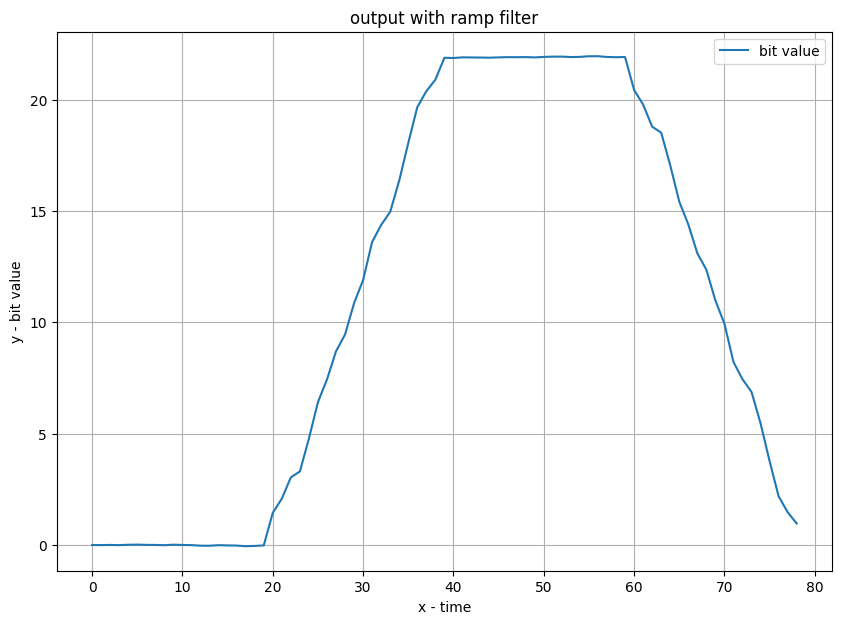

In [18]:
E = 1
for E_div_N0_db in range(-10, 21):
    E_div_N0 = 10 ** (E_div_N0_db/10)
    transmitted_samples, received_samples = add_noise(nums, E/(2*E_div_N0),n,step)
    filtered_samples, filtered_bits = calc_c(received_samples, received_filter_ramp_3,n,num_of_samples_per_bit_1)
#ploting
plt.figure(figsize=(10,7))
plt.plot(range(0, filtered_samples.flatten().shape[0]), filtered_samples.flatten(), label = "bit value")

plt.xlabel('x - time')
plt.ylabel('y - bit value')
plt.title('output with ramp filter')

plt.legend()
plt.grid()
plt.show() 

In [19]:
# constants
num_of_bits = 100000
num_of_samples_per_bit = 20

# generate random bits
generated_bits = np.random.choice([-1, 1], size=(num_of_bits), p=[1./2, 1./2])

BER_experimental_1 = []
BER_theortical_1 = []

BER_experimental_2 = []
BER_theortical_2 = []


BER_experimental_3 = []
BER_theortical_3 = []

E = 1
for E_div_N0_db in range(-10, 21):
    E_div_N0 = 10 ** (E_div_N0_db/10)
    transmitted_samples, received_samples = add_noise(generated_bits, E/(2*E_div_N0),num_of_bits,(1/num_of_samples_per_bit))
    filtered_samples1, filtered_bits1 = calc_c(received_samples, received_filter_matched_1,num_of_bits,num_of_samples_per_bit)
    filtered_samples2, filtered_bits2 = calc_c(received_samples, received_filter_matched_2,num_of_bits,num_of_samples_per_bit)
    filtered_samples3, filtered_bits3 = calc_c(received_samples, received_filter_ramp_3,num_of_bits,num_of_samples_per_bit)

    BER_experimental_1.append(calc_simulated_BER(generated_bits, filtered_bits1))
    BER_theortical_1.append(calc_theoretical_BER(E_div_N0 ** 0.5))

    BER_experimental_2.append(calc_simulated_BER(generated_bits, filtered_bits2))
    BER_theortical_2.append(calc_theoretical_BER(E_div_N0 ** 0.5))

    BER_experimental_3.append(calc_simulated_BER(generated_bits, filtered_bits3))
    BER_theortical_3.append(calc_theoretical_BER((3**0.5/2) * E_div_N0 ** 0.5))


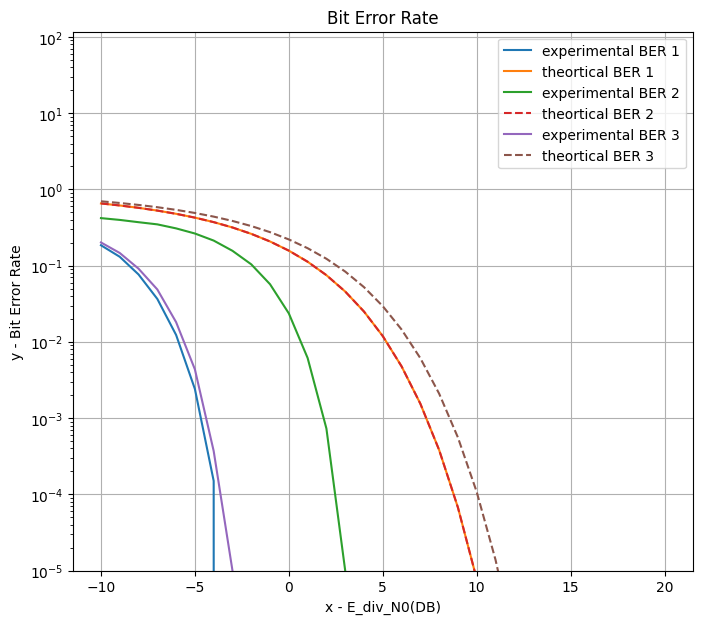

In [21]:
#ploting
plt.figure(figsize=(8,7))
plt.plot(range(-10, 21), BER_experimental_1, label = "experimental BER 1")
plt.plot(range(-10, 21), BER_theortical_1, label = "theortical BER 1")

plt.plot(range(-10, 21), BER_experimental_2, label = "experimental BER 2")
plt.plot(range(-10, 21), BER_theortical_2, "--", label = "theortical BER 2")

plt.plot(range(-10, 21), BER_experimental_3, label = "experimental BER 3")
plt.plot(range(-10, 21), BER_theortical_3, "--", label = "theortical BER 3")

plt.xlabel('x - E_div_N0(DB)')
plt.ylabel('y - Bit Error Rate')
plt.yscale('log')
plt.ylim(10**(-5))
plt.title('Bit Error Rate')

plt.legend()
plt.grid()
plt.show()